# Generate Dataset

In [1]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from tqdm.notebook import tqdm


# ====== Generating Dataset ====== #
num_data = 2400
t = np.linspace(0.0, 100.0, num_data)
y = np.sin(t) + np.sin(2*t)
e = np.random.normal(0, 0.1, num_data)
# y = y + e

seq_len = 10
X = []
y_true = []
for i in range(len(t)-seq_len):
    X.append(y[i:i+seq_len])
    y_true.append(y[i+seq_len])
    
X = np.array(X)
y_true = np.array(y_true)

X = np.swapaxes(X, 0, 1)
X = np.expand_dims(X, axis=2)
y_true = np.expand_dims(y_true, axis=1)

print(X.shape, y_true.shape)

(10, 2390, 1) (2390, 1)


# Model Define

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size):
        super(RNN, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size
        
        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()
    
        self.hidden = self.init_hidden()
        
    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)
    
    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h

In [3]:
model = RNN(input_dim=1, output_dim=1, hid_dim=50, batch_size = 2390)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
epoch = 1000

# ====== Train ===== #
model.train()

for i in tqdm(range(epoch)):
    model.zero_grad()
    optimizer.zero_grad()
    
    model.hidden = model.init_hidden()
    y_true = torch.Tensor(y_true).float()
    
    for x in X:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden
    
    loss = loss_fn(y_pred, y_true)
    loss.backward()
    optimizer.step()
    print(loss.item())

0.4429665505886078
0.4233805537223816
0.4047165811061859
0.38693147897720337
0.36998406052589417
0.35383519530296326
0.3384475111961365
0.32378533482551575
0.3098147511482239
0.2965035140514374
0.28382056951522827
0.2717367112636566
0.2602238357067108
0.24925516545772552
0.23880526423454285
0.22884975373744965
0.21936550736427307
0.21033047139644623
0.20172347128391266
0.19352445006370544
0.1857142150402069
0.1782744973897934
0.1711878478527069
0.16443763673305511
0.15800799429416656
0.15188388526439667
0.14605079591274261
0.14049501717090607
0.13520345091819763
0.1301635503768921
0.12536348402500153
0.12079183012247086
0.11643776297569275
0.11229094862937927
0.10834157466888428
0.10458023846149445
0.10099799185991287
0.09758629649877548
0.09433704614639282
0.09124249219894409
0.08829522877931595
0.08548825979232788
0.08281484991312027
0.08026862144470215
0.07784348726272583
0.07553364336490631
0.07333353906869888
0.0712379515171051
0.06924183666706085
0.0673404335975647
0.065529175102

0.018470393493771553
0.018444625660777092
0.018418902531266212
0.018393220379948616
0.0183675829321146
0.01834198459982872
0.01831643469631672
0.018290925770998
0.018265459686517715
0.01824003830552101
0.01821466162800789
0.01818932220339775
0.018164031207561493
0.01813877932727337
0.018113572150468826
0.018088405951857567
0.01806328445672989
0.018038198351860046
0.018013162538409233
0.017988165840506554
0.017963210120797157
0.017938297241926193
0.017913425341248512
0.017888594418764114
0.017863808199763298
0.017839059233665466
0.017814356833696365
0.017789693549275398
0.017765071243047714
0.017740491777658463
0.017715951427817345
0.01769145205616951
0.017666997388005257
0.017642581835389137
0.0176182072609663
0.0175938680768013
0.01756957732141018
0.017545325681567192
0.01752110943198204
0.01749693788588047
0.017472803592681885
0.01744871400296688
0.01742466539144516
0.017400654032826424
0.017376679927110672
0.017352750524878502
0.017328858375549316
0.017305007204413414
0.017281197011

0.010932983830571175
0.010919465683400631
0.010905968956649303
0.010892491787672043
0.010879036970436573
0.010865602642297745
0.010852189734578133
0.010838799178600311
0.010825427249073982
0.010812080465257168
0.010798750445246696
0.010785444639623165
0.0107721583917737
0.010758893564343452
0.010745649226009846
0.010732426308095455
0.01071922481060028
0.010706043802201748
0.010692884214222431
0.010679744184017181
0.010666623711585999
0.010653526522219181
0.010640449821949005
0.01062739547342062
0.010614358820021152
0.010601344518363476
0.01058835070580244
0.010575378313660622
0.010562422685325146
0.010549492202699184
0.01053657941520214
0.010523687116801739
0.010510815307497978
0.010497965849936008
0.010485135950148106
0.01047232560813427
0.010459535755217075
0.010446765460073948
0.010434015654027462
0.010421286337077618
0.010408577509224415
0.010395888239145279
0.010383219458162785
0.010370570234954357
0.01035794336348772
0.010345333255827427
0.01033274456858635
0.010320175439119339
0

(10, 1, 1) torch.Size([1])


(0.0, 200.0)

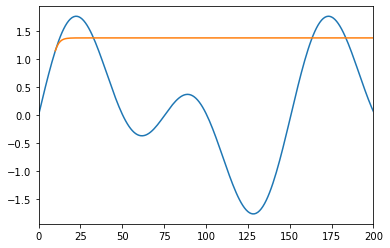

In [4]:
X_test = X[:, 0, :]
y_test = y_true[0]
X_test = np.expand_dims(X_test, 1)
print(X_test.shape, y_test.shape)

list_y_pred = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1)
    
    for x in X_test:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden
        
    list_y_pred.append(y_pred.view(-1).item())
    for i in range(2389):
        y_pred, hidden = model(y_pred)
        list_y_pred.append(y_pred.view(-1).item())
        
plt.plot(y)
plt.plot(list(range(10, 2400)), list_y_pred)
plt.xlim(0, 200)